# Load Data

In [1]:
import gc
import h5py
import numpy as np

load_path='F:/wangqi/nistcomparison/AAPlantD1_2GHz_TX1_hpol_run4_pp.mat'
load_mat=h5py.File(load_path,'r')
IQdata=load_mat['IQdata'][3600:39600,0:256].view('complex')
locations=120
records=300

# load_path='F:/wangqi/nistdataset/GBurgD2_2GHz_TX1_longPol_run2_pp.mat'
# load_mat=h5py.File(load_path,'r')
# IQdata=load_mat['IQdata'][500:9800,0:256].view('complex')
# locations=186
# records=50

# Preprocess data 

In [2]:
# model parameters
k=1  #H为k+1个h
nf=1 #参考CSI的数量
index=[0,1]
input_channels=4
len_sequence = 256                  # the input dim of the model, you should not change the value
output_dim=2
d=2
def creatHimag_Alice(idx, k, nf):
    H=np.zeros((k+nf,len_sequence)).astype(complex)
    H=IQdata[idx-nf:idx+k]
    # print(np.shape(H))
    return  np.transpose(H[index])
    # return  np.transpose(H)
def creatHimag_Eve(idx, k, nf, d):
    H=np.zeros((k+nf,len_sequence)).astype(complex)
    H[nf:k+nf,:]=IQdata[idx-d*records:idx+k-d*records]
    H[0:nf,:]=IQdata[idx-nf:idx]
    return  np.transpose(H[index])
    # return  np.transpose(H)

recs=records*d
num_dataall=locations*records-recs-10
dataall_HimagA=np.zeros((num_dataall,len_sequence, k+nf)).astype(complex)
dataall_HimagE=np.zeros((num_dataall,len_sequence, k+nf)).astype(complex)
for i in range(recs,locations*records-10):
    dataall_HimagA[i-recs,:,:]=creatHimag_Alice(i,k=k,nf=nf)
    dataall_HimagE[i-recs,:,:]=creatHimag_Eve(i,k=k,nf=nf,d=d)

dataall_TW=np.concatenate((dataall_HimagA,dataall_HimagE),axis=0)
location=[i for i in range(2)]
test_data=dataall_TW
test_lab=[val for val in location for i in range(int(num_dataall))]

del dataall_HimagA, dataall_HimagE, dataall_TW
gc.collect()

0

# creat a image

In [3]:
import numpy as np
from numpy import fft

def minmaxscaler(data):
    min = np.amin(data)
    max = np.amax(data)    
    return (data - min)/(max-min)

def convert_pic0(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=minmaxscaler(np.abs(h))
    img[1,:,:]=np.angle(h)
    img[2,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[3,:,:]=np.angle(fft.fft2(h))
    return img
def convert_pic1(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=minmaxscaler(np.abs(h))
    img[1,:,:]=minmaxscaler(np.abs(h))
    img[2,:,:]=minmaxscaler(np.abs(h))
    img[3,:,:]=minmaxscaler(np.abs(h))
    return img
def convert_pic2(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=np.angle(h)
    img[1,:,:]=np.angle(h)
    img[2,:,:]=np.angle(h)
    img[3,:,:]=np.angle(h)
    return img
def convert_pic3(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[1,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[2,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    img[3,:,:]=minmaxscaler(np.abs(fft.fft2(h)))
    return img
def convert_pic4(h):
    width, height=h.shape
    img=np.zeros([input_channels,width,height]).astype(np.float32)
    img[0,:,:]=np.angle(fft.fft2(h))
    img[1,:,:]=np.angle(fft.fft2(h))
    img[2,:,:]=np.angle(fft.fft2(h))
    img[3,:,:]=np.angle(fft.fft2(h))
    return img

# Define Dataset

In [4]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Dataset0(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset0).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic0(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset1(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset1).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic1(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset2(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset2).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic2(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset3(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset3).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic3(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

class Dataset4(Dataset):
    def __init__(self, k, X, y=None):
        super(Dataset4).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = X
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        h = convert_pic4(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)

# Authentication

In [5]:
import torch
from model_features import myNet
import numpy as np

batch_size = 32                # batch size
model_path = './model.ckpt'     # the path where the checkpoint will be saved
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE: {device}')

feature=np.zeros([len(test_lab),14976*5],dtype=float)
h0=np.zeros([1,4,256,2])
h1=np.zeros([1,4,256,2])
h2=np.zeros([1,4,256,2])
h3=np.zeros([1,4,256,2])
h4=np.zeros([1,4,256,2])
prediction0=[]
prediction1=[]
prediction2=[]
prediction3=[]
prediction4=[]
for i in range(len(test_lab)):
    h=test_data[i]
    # h=torch.tensor(h)

    _exp_name0="HM_hrun4_tapfap_3132p5152p_sample"
    model_best0 =myNet(num_classes=output_dim, aux_logits=False, init_weights=False).to(device)
    model_best0.load_state_dict(torch.load(f"{_exp_name0}_best.ckpt"),strict=False)
    model_best0.eval()
    h0[0] = convert_pic0(h)
    h00=torch.FloatTensor(h0)
    with torch.no_grad():
        test_pred0, feature0 = model_best0(h00.to(device))
        test_label0 = np.argmax(test_pred0.cpu().data.numpy(), axis=1)
        # prediction0 += test_label0.squeeze().tolist()
        # prediction0.extend(test_label0)

    _exp_name1="HM_hrun4_ta_3132p5152p_sample"
    model_best1 =myNet(num_classes=output_dim, aux_logits=False, init_weights=False).to(device)
    model_best1.load_state_dict(torch.load(f"{_exp_name1}_best.ckpt"),strict=False)
    model_best1.eval()
    h1[0] = convert_pic1(h)
    h11=torch.FloatTensor(h1)
    with torch.no_grad():
        test_pred1, feature1  = model_best1(h11.to(device))
        test_label1 = np.argmax(test_pred1.cpu().data.numpy(), axis=1)
        # prediction1 += test_label1.squeeze().tolist()
        # prediction1.extend(test_label1)
    
    _exp_name2="HM_hrun4_tp_3132p5152p_sample"
    model_best2 =myNet(num_classes=output_dim, aux_logits=False, init_weights=False).to(device)
    model_best2.load_state_dict(torch.load(f"{_exp_name2}_best.ckpt"),strict=False)
    model_best2.eval()
    h2[0] = convert_pic2(h)
    h22=torch.FloatTensor(h2)
    with torch.no_grad():
        test_pred2, feature2 = model_best2(h22.to(device))
        test_label2 = np.argmax(test_pred2.cpu().data.numpy(), axis=1)
        # prediction2 += test_label2.squeeze().tolist()
        # prediction2.extend(test_label2)

    _exp_name3="HM_hrun4_fa_3132p5152p_sample"
    model_best3 =myNet(num_classes=output_dim, aux_logits=False, init_weights=False).to(device)
    model_best3.load_state_dict(torch.load(f"{_exp_name3}_best.ckpt"),strict=False)
    model_best3.eval()
    h3[0] = convert_pic3(h)
    h33=torch.FloatTensor(h3)
    with torch.no_grad():
        test_pred3, feature3 = model_best3(h33.to(device))
        test_label3 = np.argmax(test_pred3.cpu().data.numpy(), axis=1)
        # prediction3 += test_label3.squeeze().tolist()
        # prediction3.extend(test_label3)

    _exp_name4="HM_hrun4_fp_3132p5152p_sample"
    model_best4 =myNet(num_classes=output_dim, aux_logits=False, init_weights=False).to(device)
    model_best4.load_state_dict(torch.load(f"{_exp_name4}_best.ckpt"),strict=False)
    model_best4.eval()
    h4[0] = convert_pic4(h)
    h44=torch.FloatTensor(h4)
    with torch.no_grad():
        test_pred4, feature4 = model_best4(h44.to(device))
        test_label4 = np.argmax(test_pred4.cpu().data.numpy(), axis=1)
        # prediction4 += test_label4.squeeze().tolist()
        # prediction4.extend(test_label4)

    feature[i]=np.concatenate((feature0.cpu(),feature1.cpu(),feature2.cpu(),feature3.cpu(),feature4.cpu()),axis=1)
    # print(np.size(feature0))

DEVICE: cuda:0


In [6]:
np.save('feature_run4_tapfap_3132p5152p_HMrun4',feature)
# np.load('feature_tapfap_3132p5152p_run4.npy')

# dataloder

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

class hDataset(Dataset):
    def __init__(self, k, X, y=None):
        super(hDataset).__init__()
        # self.data = torch.DoubleTensor(abs(X))
        self.data = torch.FloatTensor(X)
        self.k = k
        if y is not None:
            self.label = torch.LongTensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        h = self.data[idx]
        # h = self.tfm(h)
        if self.label is not None:
            return h, self.label[idx]
        else:
            return h

    def __len__(self):
        return len(self.data)


train_data=feature[0:len(test_lab):2]
train_label=test_lab[0:len(test_lab):2]
valid_data=feature[1:len(test_lab):2]
valid_label=test_lab[1:len(test_lab):2]
# get dataset
train_set = hDataset(k,train_data, train_label)
valid_set = hDataset(k,valid_data, valid_label)

# remove raw feature to save memory
# del train_data, valid_data, valid_label
# gc.collect()
# get dataloader
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)

num_classes=2
net= nn.Linear(14976*5, num_classes) 
net.to(device)

learning_rate = 0.0005          # learning rate
weight_decay=1e-5
patience=5
criterion = nn.CrossEntropyLoss() 
# criterion = nn.BCELoss() 
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
params = [p for p in net.parameters() if p.requires_grad]
optimizer = optim.Adam(params, lr=learning_rate, weight_decay= weight_decay)

# Retrain

In [ ]:
num_epoch=50
stale=0
best_acc = 0.0
_exp_name = "FC_hrun4_3132p5152p_sample"
train_losses=[]
train_accss=[]
valid_losses=[]
valid_accss=[]

for epoch in range(num_epoch):
    net.train()
    train_loss=[]
    train_accs=[]
# ---training---
    # train_bar = tqdm(train_loader, file=sys.stdout)
    # for batch in enumerate(train_bar):
    for batch in train_loader:    
        H, labels =batch
        H = H.to(device)
        labels = labels.to(device)
   
        optimizer.zero_grad()

        logits = net(H.to(device))
        loss =criterion(logits, labels.to(device))      
        loss.backward()
        optimizer.step()
        
        acc=(logits.argmax(dim=-1) == labels.to(device)).float().mean()
        
        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc)
        
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_losses.append(train_loss)
    train_accss.append(np.array(train_acc.cpu()))
    # Print the information.
    print(f"[ Train | {epoch + 1:03d}/{num_epoch:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")

# ---validation---
    net.eval()
    valid_loss=[]
    valid_accs=[]

    # for batch in tqdm(valid_loader):
    for batch in valid_loader:
        # A batch consists of image data and corresponding labels.
        H, labels = batch
        #imgs = imgs.half()

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
            logits= net(H.to(device))
        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels.to(device))

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc)
        #break

    # The average loss and accuracy for entire validation set is the average of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_losses.append(valid_loss)
    valid_accss.append(np.array(valid_acc.cpu()))
    # Print the information.
    print(f"[ Valid | {epoch + 1:03d}/{num_epoch:03d} ] loss = {valid_loss:.5f}, acc = {valid_acc:.5f}")        

    # update logs
    if valid_acc > best_acc:
        with open(f"./{_exp_name}_log.txt","a"):
            print(f"[ Valid | {epoch + 1:03d}/{num_epoch:03d} ] loss = {valid_loss:.5f}, acc = {valid_acc:.5f} -> best")
    else:
        with open(f"./{_exp_name}_log.txt","a"):
            print(f"[ Valid | {epoch + 1:03d}/{num_epoch:03d} ] loss = {valid_loss:.5f}, acc = {valid_acc:.5f}")


    # save models
    # if epoch % 50 == 0:
    if valid_acc > best_acc:
        print(f"Best model found at epoch {epoch}, saving model")
        torch.save(net.state_dict(), f"{_exp_name}_best.ckpt") # only save best to prevent output memory exceed error
        best_acc = valid_acc
        stale = 0
    else:
        stale += 1
        if stale > patience:
            print(f"No improvment {patience} consecutive epochs, early stopping")
            break   

[ Train | 001/050 ] loss = 0.04889, acc = 0.98963
[ Valid | 001/050 ] loss = 0.02900, acc = 0.99076
[ Valid | 001/050 ] loss = 0.02900, acc = 0.99076 -> best
Best model found at epoch 0, saving model
[ Train | 002/050 ] loss = 0.02324, acc = 0.99520
[ Valid | 002/050 ] loss = 0.00899, acc = 0.99760
[ Valid | 002/050 ] loss = 0.00899, acc = 0.99760 -> best
Best model found at epoch 1, saving model
[ Train | 003/050 ] loss = 0.01704, acc = 0.99593
[ Valid | 003/050 ] loss = 0.00595, acc = 0.99850
[ Valid | 003/050 ] loss = 0.00595, acc = 0.99850 -> best
Best model found at epoch 2, saving model
[ Train | 004/050 ] loss = 0.01442, acc = 0.99593
[ Valid | 004/050 ] loss = 0.01015, acc = 0.99664
[ Valid | 004/050 ] loss = 0.01015, acc = 0.99664
[ Train | 005/050 ] loss = 0.00687, acc = 0.99816
[ Valid | 005/050 ] loss = 0.00644, acc = 0.99797
[ Valid | 005/050 ] loss = 0.00644, acc = 0.99797
[ Train | 006/050 ] loss = 0.00610, acc = 0.99842
[ Valid | 006/050 ] loss = 0.01161, acc = 0.99599


DEVICE: cuda:0
0.0016812658943204295


<function matplotlib.pyplot.show(close=None, block=None)>

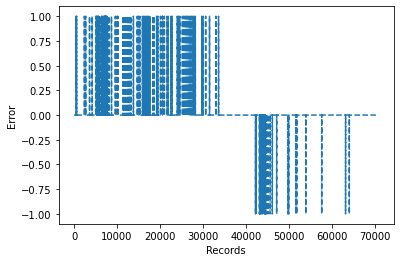

In [ ]:
import torch
import torch.nn as nn

test_set = hDataset(k, feature, test_lab)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)

model_path = './model.ckpt'     # the path where the checkpoint will be saved
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'DEVICE: {device}')
num_classes=2
_exp_name = "FC_hrun4_3132p5152p_sample"
net = nn.Linear(14976*5, num_classes) 
net.to(device)
net.load_state_dict(torch.load(f"{_exp_name}_best.ckpt"))
net.eval()
prediction=[]
with torch.no_grad():
    for data,_ in test_loader:
        test_pred = net(data.to(device))
        test_label = np.argmax(test_pred.cpu().data.numpy(), axis=1)
        prediction += test_label.squeeze().tolist()

error=np.count_nonzero(np.array(prediction)-np.array(test_lab))/len(prediction)

print(error)

error1=np.array(prediction)-np.array(test_lab)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(error1, linestyle="--")
# plt.legend(loc="best")
plt.xlabel('Records')
plt.ylabel('Error')
plt.show

In [ ]:
# print(error)